# **Data Download and Import**

In [ ]:
!kaggle datasets download denkuznetz/taxi-price-prediction

Dataset URL: https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction
License(s): apache-2.0
  0% 0.00/19.6k [00:00<?, ?B/s]
100% 19.6k/19.6k [00:00<00:00, 23.5MB/s]


In [ ]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from zipfile import ZipFile

# **Data Preprocessing**

In [ ]:
DIR_PATH = '/content/Dataset'

In [ ]:
with ZipFile('/content/taxi-price-prediction.zip' , 'r') as file:
    file.extractall(DIR_PATH)

In [ ]:
df = pd.read_csv(os.path.join(DIR_PATH , 'taxi_trip_pricing.csv'))

## **Data** **Exploration**

In [ ]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
df['Weather'].unique(), df['Time_of_Day'].unique(), df['Day_of_Week'].unique(), df['Traffic_Conditions'].unique()

(array(['Clear', nan, 'Rain', 'Snow'], dtype=object),
 array(['Morning', 'Evening', 'Afternoon', 'Night', nan], dtype=object),
 array(['Weekday', 'Weekend', nan], dtype=object),
 array(['Low', 'High', 'Medium', nan], dtype=object))

In [ ]:
#Checking for missing values
df.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Handle missing values
numerical_cols = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare',
                  'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

## **Exploratory Data Analysis**

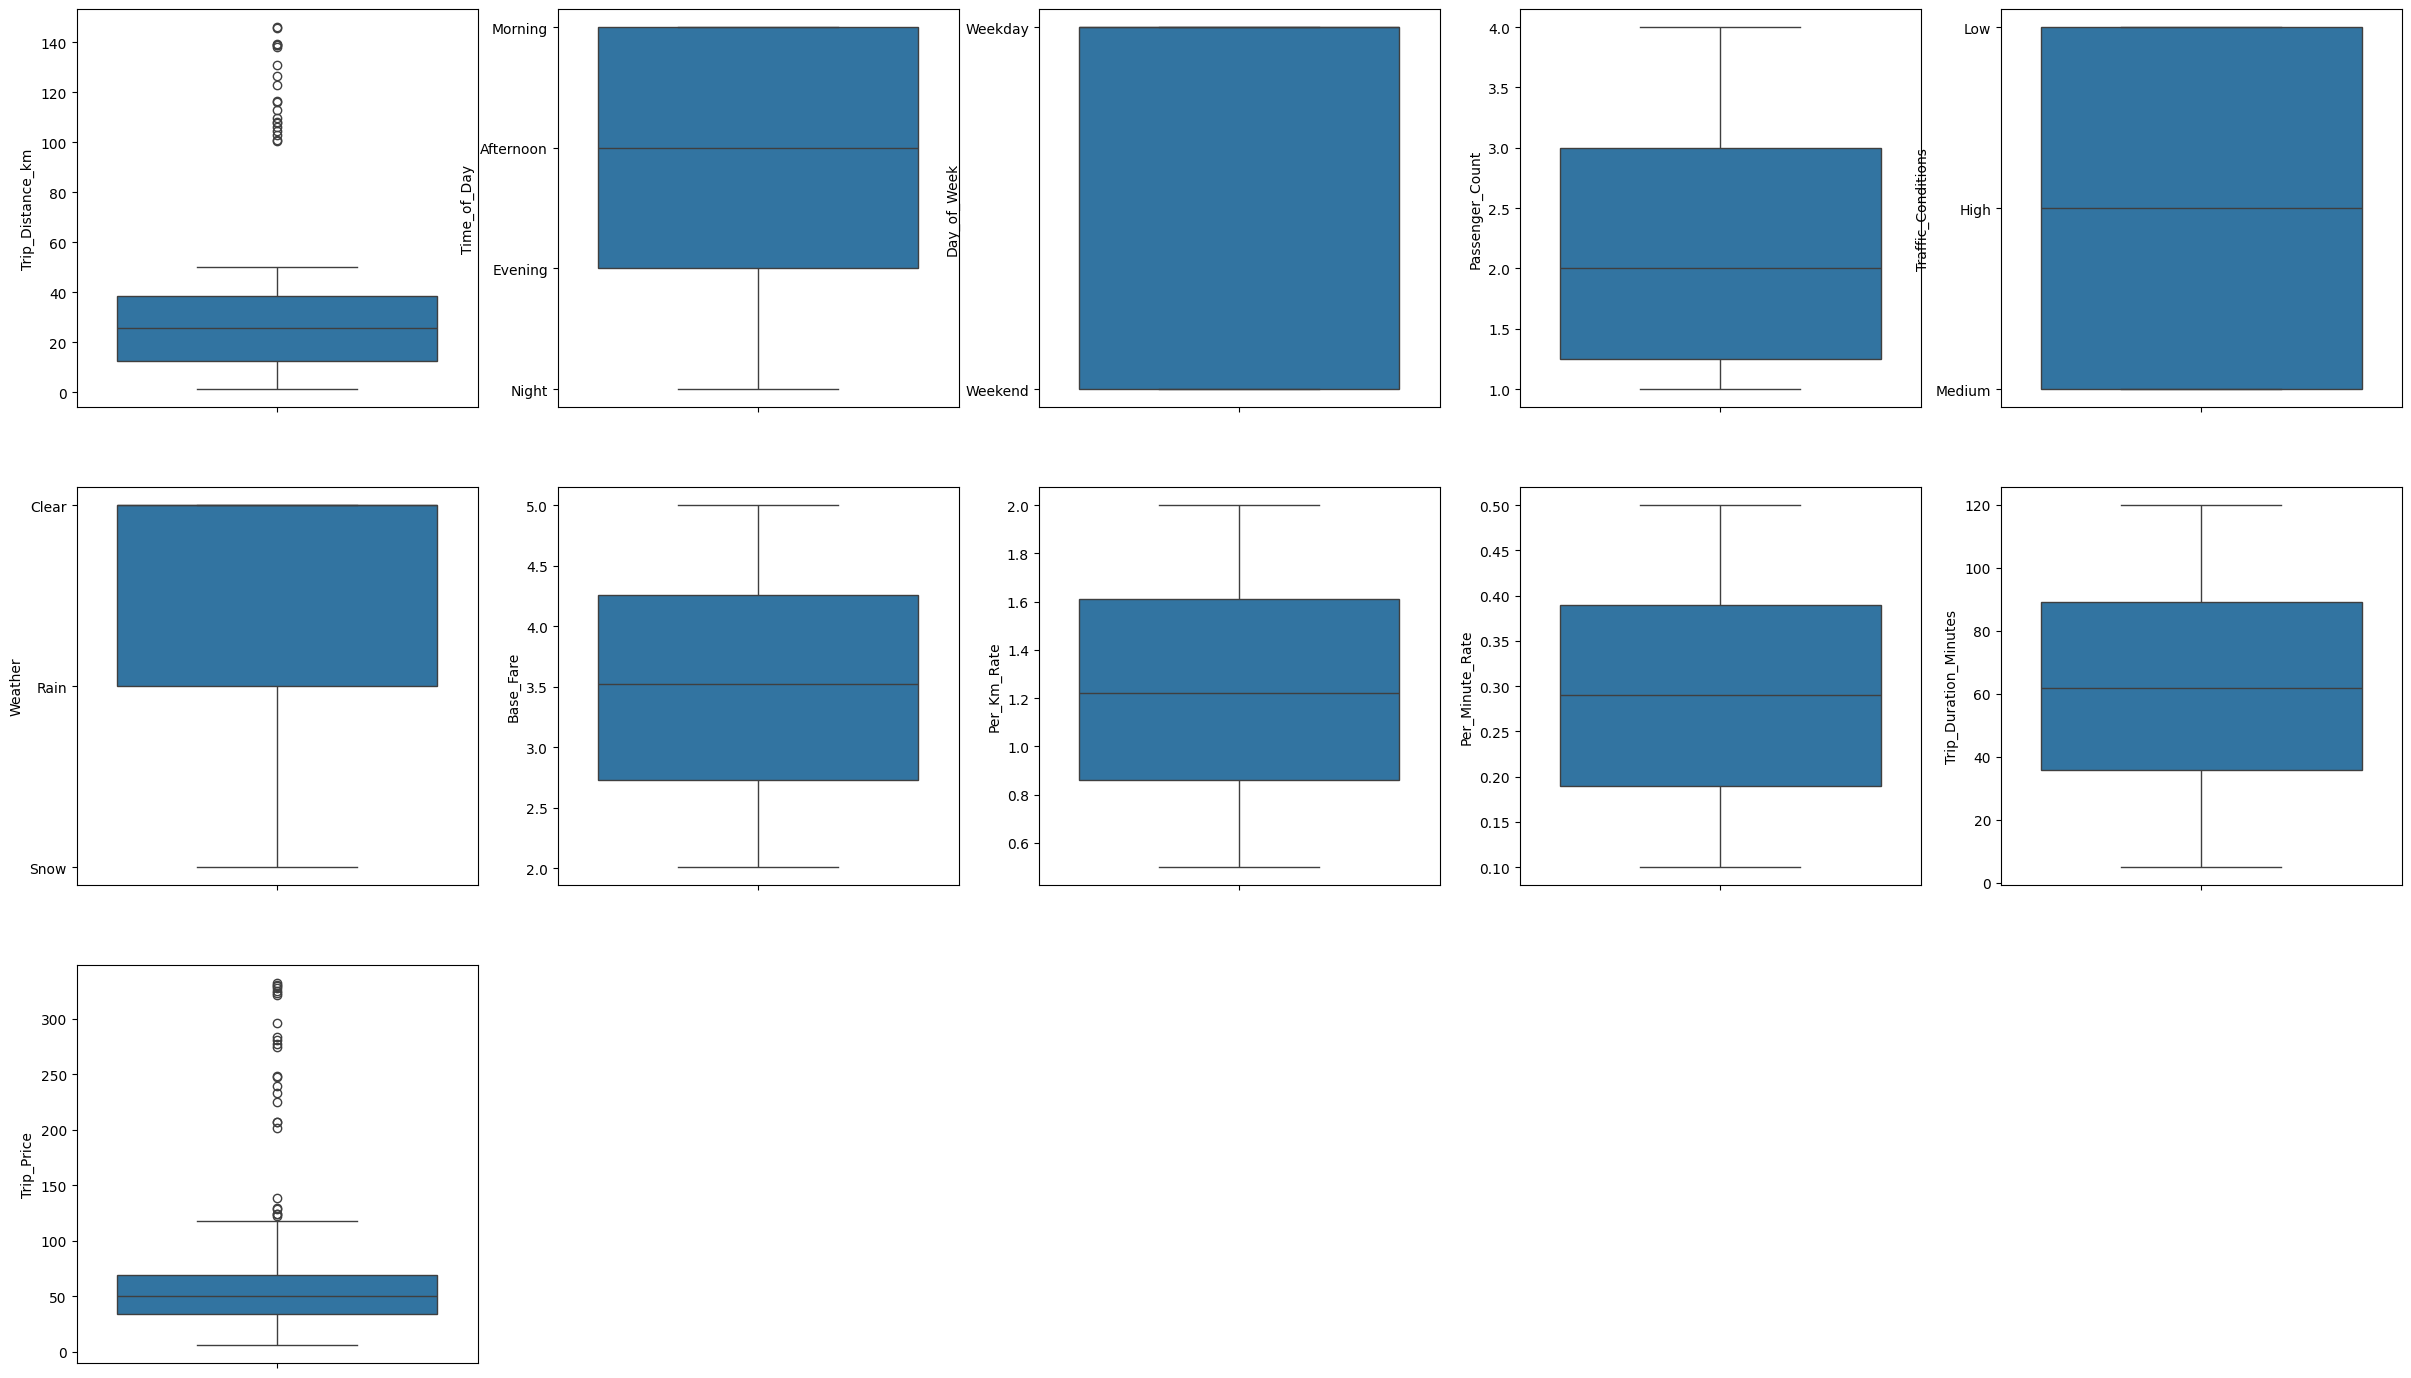

In [ ]:
#Visualizing and detecting outliers through box-plot
plt.figure(figsize=(30, 30))
for i, col in enumerate(df.columns[:]):
    plt.subplot(5, 5, i+1)
    sns.boxplot(data=df, y=col)
plt.show()

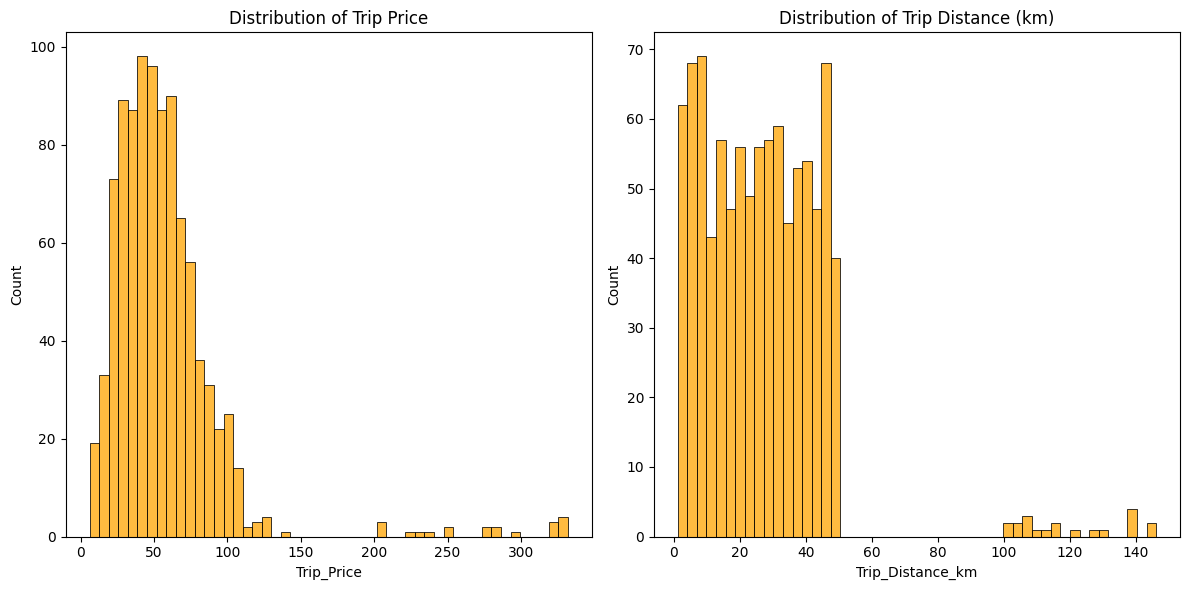

In [ ]:
# Plotting histograms to understand distributions of `Trip_Price` and `Trip_Distance_km`
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(data=df['Trip_Price'], bins=50, color='orange', ax=axes[0])
axes[0].set_title('Distribution of Trip Price')

sns.histplot(data=df['Trip_Distance_km'], bins=50, color='orange', ax=axes[1])
axes[1].set_title('Distribution of Trip Distance (km)')

plt.tight_layout()
plt.show()

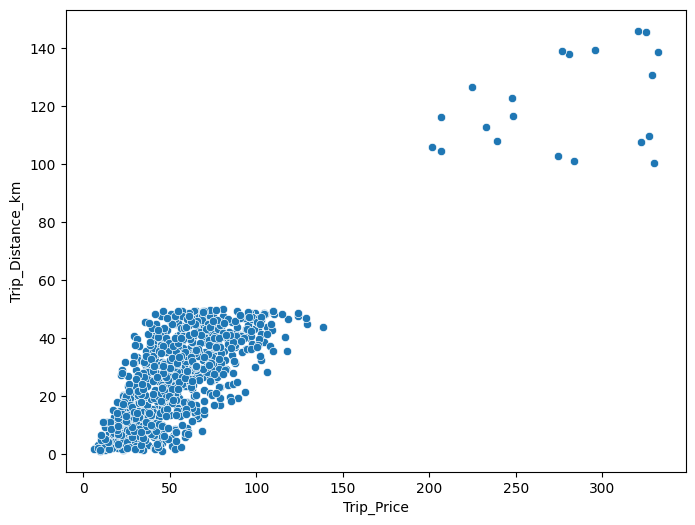

In [ ]:
# Plotting histograms to understand distributions of `Trip_Price` and `Trip_Distance_km`
plt.figure(figsize=(8,6))
sns.scatterplot(df,x='Trip_Price',y='Trip_Distance_km')
plt.title='Trip Price Vs. Trip Distance'
plt.show()

## **Feature Selection and Feature Scaling**

In [ ]:
# Drop rows with missing target values
df.dropna(subset=['Trip_Price'], inplace=True)

# Selecting the target variable and dropping it from the DataFrame
y = df['Trip_Price']
df.drop(columns=['Trip_Price'] , inplace = True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

categorical_pipe = Pipeline([
  ('imputer' , SimpleImputer(strategy='most_frequent')),
  ('encoder' , OneHotEncoder(sparse_output=False))
])

numerical_pipe = Pipeline([
  ('imputer' , SimpleImputer(strategy='mean')),
  ('scaler' , StandardScaler())
])

pipeline = ColumnTransformer([
    ('column-pipeline' , categorical_pipe , categorical_cols),
    ('numerical-pipeline' , numerical_pipe , numerical_cols)
])

In [ ]:
processed_data = pipeline.fit_transform(df)

In [ ]:
processed_data.shape

(951, 18)

# **Model Training and Evaluation**

In [ ]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(processed_data , y , test_size=0.2 , random_state=42)

In [ ]:
#importing the Models for traning and testing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Declaring the models in a dictionary
models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "DecisionTree_regressor": DecisionTreeRegressor(),
    "KNeighbors_Regressor": KNeighborsRegressor()
          }

In [ ]:
#using the pipeline, predicting the MSE,MAE, R^2
output = {'Model':[], 'MSE': [], 'MAE':[], 'R2':[]}

for model_name , model in models.items():
  model.fit(x_train , y_train)
  y_pred = model.predict(x_test)
  output['Model'].append(model_name)
  output['MSE'].append(mean_squared_error(y_test , y_pred))
  output['MAE'].append(mean_absolute_error(y_test , y_pred))
  output['R2'].append(r2_score(y_test , y_pred))



Suitable Outcomes:
1. Lower the MSE values
2. Lower the MAE values
3. Higher the R^2 values




In [ ]:
df_1 = pd.DataFrame(output)
print(df_1)

                    Model         MSE        MAE        R2
0       Linear_Regression  289.331170   9.769590  0.876216
1  RandomForest_Regressor  141.592944   6.328559  0.939422
2  DecisionTree_regressor  363.588707  10.583138  0.844446
3    KNeighbors_Regressor  265.967561  11.559251  0.886211


# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestRegressor()
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(rf, params, cv = 3, scoring='neg_mean_squared_error', verbose = 2)
grid_search.fit(x_train , y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total t

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
model = grid_search.best_estimator_
score = grid_search.best_score_

In [ ]:
print(f'The MSE score for the best model is : {abs(score)}')

The MSE score for the best model is : 105.94064008553585


In [ ]:
predictions = model.predict(x_test)
test_score = mean_absolute_error(y_test , predictions)

print(f'The MAE on the test set is : {test_score}')

The MAE on the test set is : 6.332374467586963


# **Model Saving**

In [ ]:
import pickle

# Saving the best model
with open('model.pkl' , 'wb') as file:
  pickle.dump(model , file)

# Saving the preprocessing pipeline
with open('pipeline.pkl' , 'wb') as file:
  pickle.dump(pipeline , file)